
# Logistic Regression on sentiment analysis

This notebook will utilize the dataset of the movie reviews in the reviews.csv and practice.csv.
Goal: Predict if a movie review is **positive (1)** or **negative (0)**.




In [7]:

# Core libraries
import pandas as pd
import numpy as np

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load training and testing CSV files (must be in the same folder as the notebook)
train_df = pd.read_csv("practice.csv")
test_df = pd.read_csv("reviews.csv")

# Show ALL rows in the training dataset
print("=== Training Data (practice.csv) ===")
pd.set_option("display.max_rows", None)
print(train_df)

# Show dataset shape (rows, columns)
print("\nTraining Shape:", train_df.shape)

# Check class balance for training set
print("\nTraining Label counts:")
print(train_df["label"].value_counts())

# Show ALL rows in the testing dataset
print("\n=== Testing Data (reviews.csv) ===")
print(test_df)

# Show dataset shape
print("\nTesting Shape:", test_df.shape)

# Check class balance for test set
print("\nTesting Label counts:")
print(test_df["label"].value_counts())



=== Training Data (practice.csv) ===
                                                  text  label
0    What a heartfelt story with a perfect blend of...    1.0
1    Has a very stunning visuals, it was a true fea...    1.0
2    The characters are rich in emotion depth and t...    1.0
3    The execution was great and original with a lo...    1.0
4    Amazing performance it deeply resonanted with ...    1.0
5    It is a thrilling experience, it has full of e...    1.0
6      A powerful story telling  that moves my heart.     1.0
7    An unforgettable experience like nothing I hav...    1.0
8        The character interaction are very elevating.    1.0
9    I am on the edge of my set watching this maste...    1.0
10   It very wholesome and uplifting I love this mo...    1.0
11      This movie is very enjoyable and interesting .    1.0
12     it is fun experience and it is very fast paced.    1.0
13   A very emotional  movie, I love how it is very...    1.0
14   The story is well written an

In [9]:
# Drop rows where 'text' is missing or NaN
train_df = train_df.dropna(subset=["text"])
test_df = test_df.dropna(subset=["text"])

# Make sure text is always a string
train_df["text"] = train_df["text"].astype(str)
test_df["text"] = test_df["text"].astype(str)

# Split again
X_train = train_df["text"]
y_train = train_df["label"]
X_test = test_df["text"]
y_test = test_df["label"]

In [10]:
# ===============================
# 4. Vectorization (TF-IDF)
# ===============================
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",      # remove common words
    ngram_range=(1,3),         # unigrams, bigrams, trigrams
    max_features=10000         # more features for better learning
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ===============================
# 5. Train Logistic Regression
# ===============================
model = LogisticRegression(
    solver="liblinear",
    C=10,                      # less regularization
    class_weight="balanced",   # handle imbalance
    max_iter=2000
)

model.fit(X_train_tfidf, y_train)


LogisticRegression(C=10, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



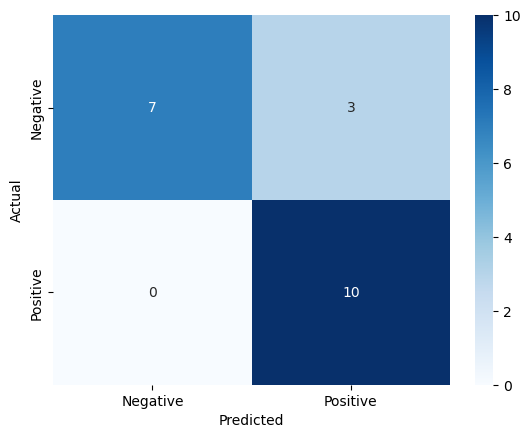

In [11]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Predict function with summary counts
def predict_sentiment_table(texts):
    results = []
    for t in texts:
        vec = vectorizer.transform([t])         # convert text → TF-IDF numbers
        prob = model.predict_proba(vec)[0,1]    # probability of being Positive
        label = "Positive" if prob >= 0.5 else "Negative"  # threshold = 0.5
        results.append({
            "Text": t,
            "Prediction": label,
            "Confidence (%)": round(prob*100, 1) # nice formatting
        })
    
    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    # Count how many Positive vs Negative
    summary = df["Prediction"].value_counts()
    
    print("=== Prediction Results ===")
    print(df)
    print("\n=== Summary ===")
    print(f"Positive reviews: {summary.get('Positive', 0)}")
    print(f"Negative reviews: {summary.get('Negative', 0)}")
    
    return df

# Sample predictions
sample_reviews = [
    "The movie was amazing and inspiring",
    "I hated this film, it was awful",
    "The soundtrack was beautiful",
    "I walk out it is a very bad movie",
    "It was okay, was good but not great"
]

results_df = predict_sentiment_table(sample_reviews)


=== Prediction Results ===
                                  Text Prediction  Confidence (%)
0  The movie was amazing and inspiring   Positive            70.9
1      I hated this film, it was awful   Negative            45.0
2         The soundtrack was beautiful   Positive            52.5
3    I walk out it is a very bad movie   Negative            30.5
4  It was okay, was good but not great   Positive            52.9

=== Summary ===
Positive reviews: 3
Negative reviews: 2
